In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



In [2]:
def create_lag_df(yf_name):   #input as string
    stock = yf.Ticker(yf_name)
    df = stock.history('6mo')
    df_exp = df[['Close']]
    # print(df_exp)

    for i in range(1,30+1):
        df_exp[f'Close_lag{i}d'] = df_exp['Close'].shift(i) #next i day
    df_exp = df_exp.dropna()
    # print(df_exp)
    return df_exp

#col to remove
def remove_col(lag_df, days_no):
    col_to_remove = []
    for i in range(1,days_no+1):
        col_to_remove.append(f"Close_lag{i}d")
    df_dropped = lag_df.drop(col_to_remove, axis=1)
    return df_dropped

def create_label_feature_df(df_dropped):
    df_features = df_dropped.drop('Close', axis=1)
    df_label = pd.DataFrame(df_dropped['Close'])
    return df_features, df_label

def split(df_features, df_label, test_size):
    row_no = df_features.shape[0]
    train_row_no = round(row_no*(1.0-test_size))
    print(row_no)

    X_train = df_features.iloc[:train_row_no, :]
    X_test  = df_features.iloc[train_row_no:row_no, :]
    y_train = df_label.iloc[:train_row_no, :]
    y_test  = df_label.iloc[train_row_no:row_no, :]
    return X_train, X_test, y_train, y_test

# yf_name = "AAPL"
# yf_name = "^GSPC"
yf_name = "BTC-USD"
# yf_name = "AXON"
#feature for training
lag_df = create_lag_df(yf_name)
df_dropped = remove_col(lag_df,7)
X, y = create_label_feature_df(df_dropped)
X_train, X_test, y_train, y_test = split(X, y,0.2)
date_df = lag_df.index
lag_df

153


C:\Users\Norapath Arjanurak\AppData\Local\Temp\ipykernel_30012\3036575753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[f'Close_lag{i}d'] = df_exp['Close'].shift(i) #next i day
C:\Users\Norapath Arjanurak\AppData\Local\Temp\ipykernel_30012\3036575753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp[f'Close_lag{i}d'] = df_exp['Close'].shift(i) #next i day
C:\Users\Norapath Arjanurak\AppData\Local\Temp\ipykernel_30012\3036575753.py:8: SettingWithCopyWarning: 
A value is trying to be set

,Close,Close_lag1d,Close_lag2d,Close_lag3d,Close_lag4d,Close_lag5d,Close_lag6d,Close_lag7d,Close_lag8d,Close_lag9d,...,Close_lag21d,Close_lag22d,Close_lag23d,Close_lag24d,Close_lag25d,Close_lag26d,Close_lag27d,Close_lag28d,Close_lag29d,Close_lag30d
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-16 00:00:00+00:00,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,56705.097656,55849.109375,...,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,66490.296875,66639.046875
2024-07-17 00:00:00+00:00,64118.792969,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,56705.097656,...,60811.277344,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,66490.296875
2024-07-18 00:00:00+00:00,63974.066406,64118.792969,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,58009.226562,...,61604.800781,60811.277344,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094
2024-07-19 00:00:00+00:00,66710.156250,63974.066406,64118.792969,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,57742.496094,...,60320.136719,61604.800781,60811.277344,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875
2024-07-20 00:00:00+00:00,67163.648438,66710.156250,63974.066406,64118.792969,65097.148438,64870.152344,60787.792969,59231.953125,57899.464844,57344.914062,...,60887.378906,60320.136719,61604.800781,60811.277344,61804.640625,60277.414062,63180.796875,64252.578125,64096.199219,64828.656250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 00:00:00+00:00,101173.031250,96675.429688,97432.718750,101236.015625,99923.335938,99920.710938,96593.570312,98768.531250,96002.164062,95865.304688,...,94339.492188,92343.789062,90542.640625,89845.851562,90558.476562,91066.007812,87250.429688,90584.164062,87955.812500,88701.484375
2024-12-12 00:00:00+00:00,100043.000000,101173.031250,96675.429688,97432.718750,101236.015625,99923.335938,99920.710938,96593.570312,98768.531250,96002.164062,...,98504.726562,94339.492188,92343.789062,90542.640625,89845.851562,90558.476562,91066.007812,87250.429688,90584.164062,87955.812500
2024-12-13 00:00:00+00:00,101459.257812,100043.000000,101173.031250,96675.429688,97432.718750,101236.015625,99923.335938,99920.710938,96593.570312,98768.531250,...,98997.664062,98504.726562,94339.492188,92343.789062,90542.640625,89845.851562,90558.476562,91066.007812,87250.429688,90584.164062


In [3]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = windowed_dataframe.index.to_numpy()

  middle_matrix = df_as_np[:, 1:]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, 0]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(lag_df)

dates.shape, X.shape, y.shape
# dates

((153,), (153, 30, 1), (153,))

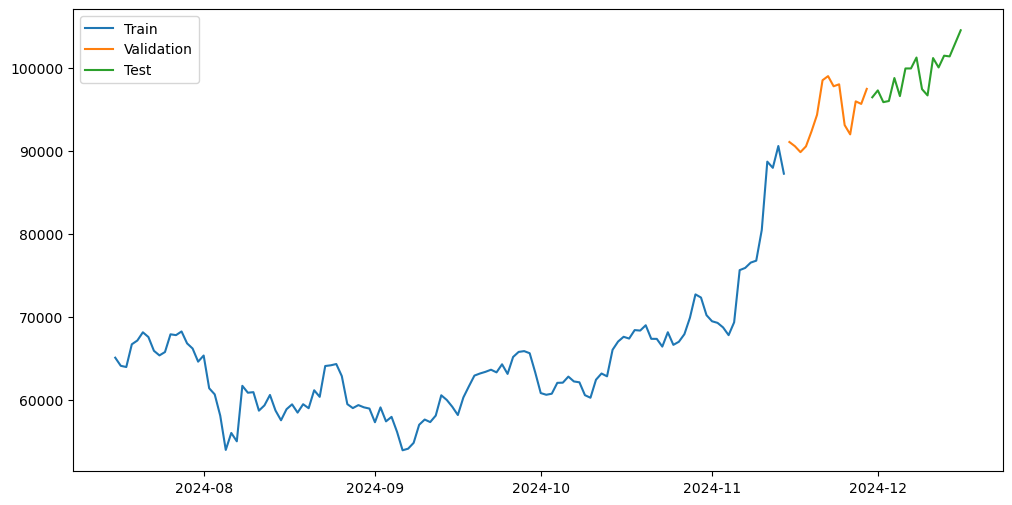

In [4]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(12, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [5]:
from tensorflow.keras.models import Sequential

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(30, 1)),
    Dense(1)
])

# Compile model with MSE as loss and MAE as a metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 139ms/step - loss: 11447475200.0000 - mae: 98320.7109 - val_loss: 10798602240.0000 - val_mae: 103738.9297
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 5067940864.0000 - mae: 70263.2891 - val_loss: 10529718272.0000 - val_mae: 101835.3516
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 5025379328.0000 - mae: 67392.5703 - val_loss: 13751958528.0000 - val_mae: 112594.2969
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 4262156288.0000 - mae: 63269.7617 - val_loss: 15498662912.0000 - val_mae: 120288.0703
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 7047872512.0000 - mae: 78640.1797 - val_loss: 17297444864.0000 - val_mae: 124171.6016
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 7794442752.0000 - mae: 82262.3984 - val_loss: 11304371200.0000 - val_mae: 101633.7969
Epoch 7/100
4/4 [==============================] -

1/1 [==============================] - 0s 19ms/step


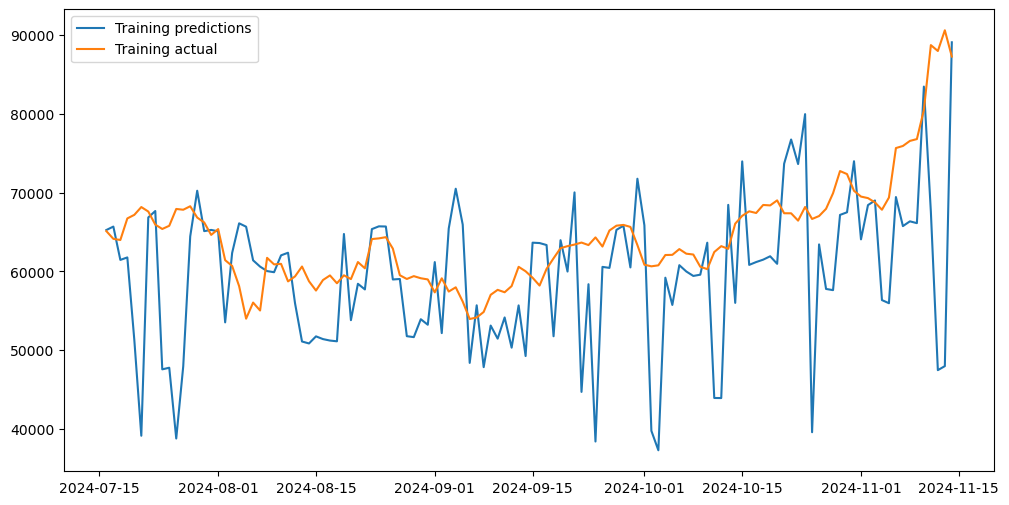

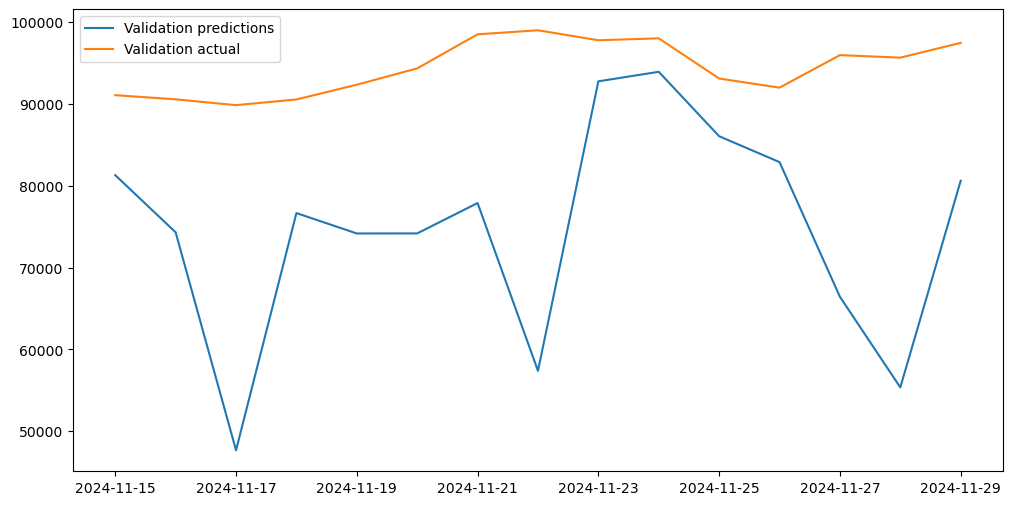

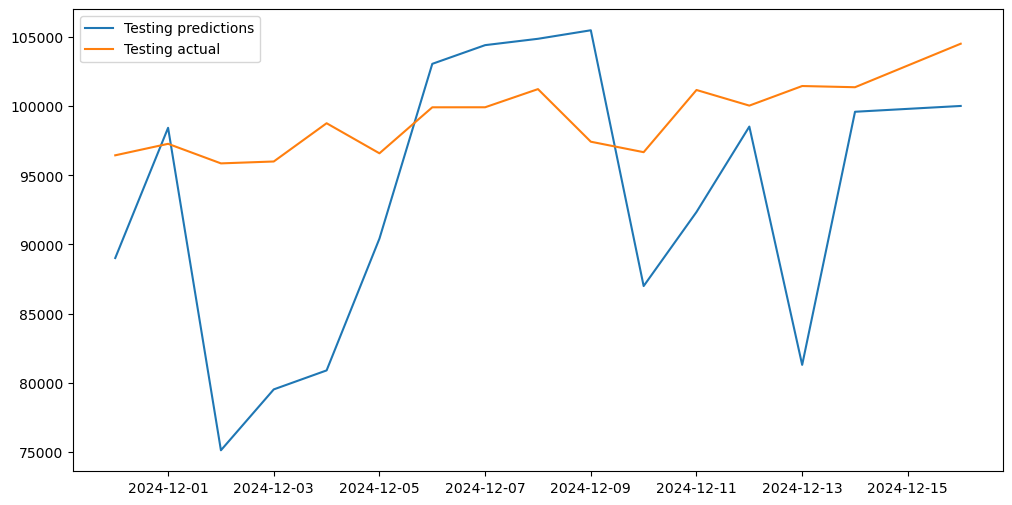

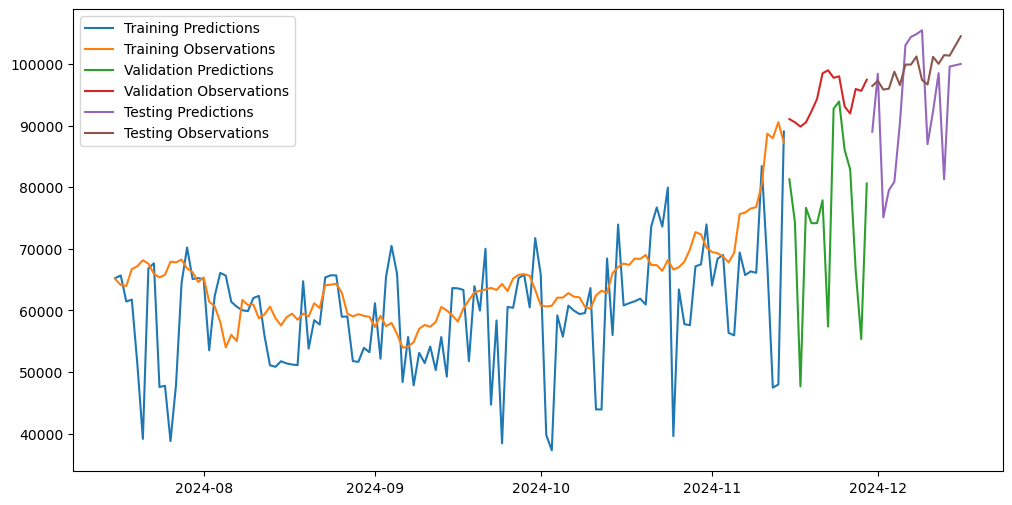

In [6]:
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(12, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training predictions', 'Training actual'])

plt.figure(figsize=(12, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation predictions', 'Validation actual'])

plt.figure(figsize=(12, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing predictions', 'Testing actual'])

plt.figure(figsize=(12, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])